In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [42]:
# Load the CSV file
df = pd.read_csv('lottery_stats.csv')

# Check for any missing values
print(df.isnull().sum())

# Drop rows with missing values if necessary
df.dropna(inplace=True)
df = df.sort_index(ascending=False).reset_index(drop=True)

วันที่         0
รางวัลที่ 1    0
2 ตัวบน        0
3 ตัวบน        0
2 ตัวล่าง      0
3 ตัวหน้า      0
3 ตัวล่าง      0
dtype: int64


In [43]:
df

,วันที่,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวล่าง
0,มิถุนายน มิ.ย 2547,614144,44,144,72,990 776,425 992
1,มิถุนายน มิ.ย 2547,208713,13,713,87,414 911,459 986
2,กรกฎาคม ก.ค. 2547,312471,71,471,66,313 598,664 261
3,กรกฎาคม ก.ค. 2547,205588,88,588,25,696 726,461 154
4,สิงหาคม ส.ค. 2547,868990,90,990,45,956 811,510 377
...,...,...,...,...,...,...,...
475,พฤษภาคม พ.ค. 2567,980116,16,116,17,104 763,634 833
476,พฤษภาคม พ.ค. 2567,205690,90,690,60,747 885,070 137
477,มิถุนายน มิ.ย 2567,530593,93,593,42,194 364,421 734
478,มิถุนายน มิ.ย 2567,518504,4,504,31,016 428,426 447


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
df[['2 ตัวบน', '3 ตัวบน', '2 ตัวล่าง', '3 ตัวหน้า', '3 ตัวล่าง']] = scaler.fit_transform(
    df[['2 ตัวบน', '3 ตัวบน', '2 ตัวล่าง', '3 ตัวหน้า', '3 ตัวล่าง']]
)

# Separate features and target variable
X = df[['2 ตัวบน', '3 ตัวบน', '2 ตัวล่าง', '3 ตัวหน้า', '3 ตัวล่าง']].values
y = df['รางวัลที่ 1'].values

# Reshape y for LSTM (this will depend on whether you want to predict a sequence or just one step)
y = y.reshape(-1, 1)


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Reshape the data for LSTM [samples, time steps, features]
# For simplicity, let's use 1 time step for each feature set
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Denormalize the predictions
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# Print the first few predictions and actual values
print('Predictions:', y_pred[:5])
print('Actual Values:', y_test[:5])


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Denormalize the predictions
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# Print the first few predictions and actual values
print('Predictions:', y_pred[:5])
print('Actual Values:', y_test[:5])


วันที่         0
รางวัลที่ 1    0
2 ตัวบน        0
3 ตัวบน        0
2 ตัวล่าง      0
3 ตัวหน้า      0
3 ตัวล่าง      0
dtype: int64
Epoch 1/100


C:\Users\Kuna\AppData\Local\Temp\ipykernel_55920\2634139559.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


24/24 [==============================] - 1s 11ms/step - loss: 0.2061 - val_loss: 0.0900
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0683 - val_loss: 0.0726
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0530
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0366 - val_loss: 0.0365
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0161
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 8.2837e-04 - val_loss: 8.9899e-04
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 6.4935e-04 - val_loss: 7.4388e-04
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 5.2027e-04 - val_loss: 6.8484e

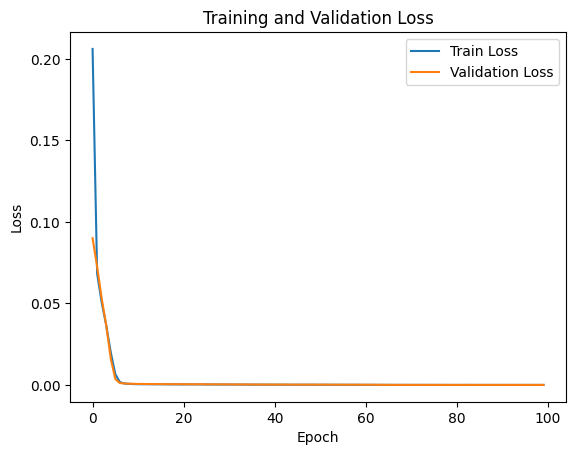

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('lottery_stats.csv')

# Check for any missing values
print(df.isnull().sum())

# Drop rows with missing values if necessary
df.dropna(inplace=True)
df = df.sort_index(ascending=False).reset_index(drop=True)

# Drop the 'วันที่' column as it's not needed for predictions
df.drop(columns=['วันที่'], inplace=True)

# Convert columns to float
df = df.apply(pd.to_numeric, errors='ignore')

# Split '3 ตัวหน้า' and '3 ตัวล่าง' into separate columns
df[['3 ตัวหน้า_1', '3 ตัวหน้า_2']] = df['3 ตัวหน้า'].astype(str).str.split(' ', expand=True)
df[['3 ตัวล่าง_1', '3 ตัวล่าง_2']] = df['3 ตัวล่าง'].astype(str).str.split(' ',  expand=True)

# Convert the split columns to numeric
df[['3 ตัวหน้า_1', '3 ตัวหน้า_2', '3 ตัวล่าง_1', '3 ตัวล่าง_2']] = df[['3 ตัวหน้า_1', '3 ตัวหน้า_2', '3 ตัวล่าง_1', '3 ตัวล่าง_2']].apply(pd.to_numeric)

# Drop the original '3 ตัวหน้า' and '3 ตัวล่าง' columns
df.drop(columns=['3 ตัวหน้า', '3 ตัวล่าง'], inplace=True)

# Add the index as a feature
df['Index'] = df.index

# Normalize the data
scaler = MinMaxScaler()
df[['2 ตัวบน', '3 ตัวบน', '2 ตัวล่าง', '3 ตัวหน้า_1', '3 ตัวหน้า_2', '3 ตัวล่าง_1', '3 ตัวล่าง_2', 'Index']] = scaler.fit_transform(
    df[['2 ตัวบน', '3 ตัวบน', '2 ตัวล่าง', '3 ตัวหน้า_1', '3 ตัวหน้า_2', '3 ตัวล่าง_1', '3 ตัวล่าง_2', 'Index']]
)

# Separate features and target variable
X = df[['2 ตัวบน', '3 ตัวบน', '2 ตัวล่าง', '3 ตัวหน้า_1', '3 ตัวหน้า_2', '3 ตัวล่าง_1', '3 ตัวล่าง_2', 'Index']].values
y = df['3 ตัวบน'].values

# Reshape y for LSTM
y = y.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(8))  # Output layer for regression
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Denormalize the predictions (Assuming the target variable was also scaled)
scaler_target = MinMaxScaler()
scaler_target.fit(y)
y_test = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Print the first few predictions and actual values
print('Predictions:', y_pred[:5])
print('Actual Values:', y_test[:5])

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [46]:
# Denormalize and convert to integers manually
# Assuming that the original values were between 0 and 999
min_val = 0
max_val = 99

# Convert predictions and actual values from normalized range [0, 1] to [0, 999]
y_pred_original = y_pred * (max_val - min_val) + min_val
y_test_original = y_test * (max_val - min_val) + min_val

# Round to nearest integers
y_pred_int = np.round(y_pred_original).astype(int)
y_test_int = np.round(y_test_original).astype(int)

# Print the denormalized predictions and actual values
print('Predictions:', y_pred_int[:5])
print('Actual Values:', y_test_int[:5])


Predictions: [[19]
 [37]
 [30]
 [25]
 [53]]
Actual Values: [[19]
 [37]
 [30]
 [25]
 [53]]


*** 2 ตัวบน